In [403]:
import pandas as pd
import numpy as np

In [404]:
try:
    beds_df=pd.read_csv('Data/Data/의료기관_소재지_및_유형별__병실입원별_병상수_20230714120000.csv',encoding='cp949')
except:
    beds_df=pd.read_csv('Data/의료기관_소재지_및_유형별__병실입원별_병상수_20230714120000.csv',encoding='cp949')
beds_df.drop('유형별(1)',axis=1,inplace=True)
beds_df.drop('유형별(2)',axis=1,inplace=True)
beds_df = beds_df.drop(beds_df.index[0])

for i in beds_df['2015']:
    if i == '-':
        beds_df['2015'] = beds_df['2015'].replace('-',0)
for i in beds_df['2015.1']:
    if i == '-':
        beds_df['2015.1'] = beds_df['2015.1'].replace('-',0)
        # print(i)
beds_df['2015.1']=beds_df['2015.1'].astype(int)
beds_df['2015']=beds_df['2015'].astype(int)
beds_df['2015']=beds_df['2015']+beds_df['2015.1']
beds_df.drop('2015.1',axis=1,inplace=True)
beds_df.reset_index(drop=True,inplace=True)

for i in range(len(beds_df.index)):
    if beds_df['시군구별(1)'][i] == '서울':
        beds_df.loc[i,'시군구별(1)'] = '서울특별시'
    elif beds_df['시군구별(1)'][i] == '부산':
        beds_df.loc[i,'시군구별(1)'] = '부산광역시'
    elif beds_df['시군구별(1)'][i] == '대구':
        beds_df.loc[i,'시군구별(1)'] = '대구광역시'
    elif beds_df['시군구별(1)'][i] == '인천':
        beds_df.loc[i,'시군구별(1)'] = '인천광역시'
    elif beds_df['시군구별(1)'][i] == '광주':
        beds_df.loc[i,'시군구별(1)'] = '광주광역시'
    elif beds_df['시군구별(1)'][i] == '대전':
        beds_df.loc[i,'시군구별(1)'] = '대전광역시'
    elif beds_df['시군구별(1)'][i] == '울산':
        beds_df.loc[i,'시군구별(1)'] = '울산광역시'
    elif beds_df['시군구별(1)'][i] == '세종':
        beds_df.loc[i,'시군구별(1)'] = '세종특별자치시'
    elif beds_df['시군구별(1)'][i] == '경기':
        beds_df.loc[i,'시군구별(1)'] = '경기도'
    elif beds_df['시군구별(1)'][i] == '강원':
        beds_df.loc[i,'시군구별(1)'] = '강원도'
    elif beds_df['시군구별(1)'][i] == '충북':
        beds_df.loc[i,'시군구별(1)'] = '충청북도'
    elif beds_df['시군구별(1)'][i] == '충남':
        beds_df.loc[i,'시군구별(1)'] = '충청남도'
    elif beds_df['시군구별(1)'][i] == '전북':
        beds_df.loc[i,'시군구별(1)'] = '전라북도'
    elif beds_df['시군구별(1)'][i] == '전남':
        beds_df.loc[i,'시군구별(1)'] = '전라남도'
    elif beds_df['시군구별(1)'][i] == '경북':
        beds_df.loc[i,'시군구별(1)'] = '경상북도'
    elif beds_df['시군구별(1)'][i] == '경남':
        beds_df.loc[i,'시군구별(1)'] = '경상남도'
    elif beds_df['시군구별(1)'][i] == '제주':
        beds_df.loc[i,'시군구별(1)'] = '제주특별자치도'

    if '구' in beds_df['시군구별(2)'][i][-1:]:
        if '시' in beds_df['시군구별(2)'][i]:
            beds_df.loc[i,'시군구별(2)']=beds_df.loc[i,'시군구별(2)'].split('시')[0]+'시'
    beds_df.loc[i, '시군구별(2)'] = beds_df.loc[i, '시군구별(1)'] + ' ' + beds_df.loc[i, '시군구별(2)']



# '시군구별(2)' 열로 행 그룹화
grouped = beds_df.groupby('시군구별(2)')

# 합산할 열과 첫 번째 값을 유지할 열 지정
aggregated = grouped.agg({'2015': 'sum', '시군구별(1)': 'first'})

# 집계된 데이터로 데이터프레임 업데이트
beds_df = aggregated.reset_index()

beds_df.drop('시군구별(1)',axis=1,inplace=True)
beds_df.columns = ['지역', '병상수']
beds_df

,지역,병상수
0,강원도 강릉시,1566
1,강원도 동해시,657
2,강원도 삼척시,245
3,강원도 속초시,477
4,강원도 양구군,163
...,...,...
213,충청북도 제천시,698
214,충청북도 증평군,173
215,충청북도 진천군,219
216,충청북도 청주시,4246


In [405]:
def beds_count(location):
    population = int(beds_df.loc[beds_df['지역']
                     == location, '병상수'].iloc[0])
    return (population)


locate = '서울특별시 강남구'
beds_count(locate)

4726

In [406]:
try:
    hospital_df=pd.read_csv('Data\의료기관_소재지_및_유형별_의료기관수_20230714112156.csv',encoding='cp949')
except:
    hospital_df=pd.read_csv('Data/의료기관_소재지_및_유형별_의료기관수_20230714112156.csv',encoding='cp949')
hospital_df.drop('유형별',axis=1,inplace=True)
hospital_df.drop('병상수',axis=1,inplace=True)

hospital_df = hospital_df.drop(hospital_df.index[0])
hospital_df.reset_index(drop=True,inplace=True)

for i in range(len(hospital_df.index)):
    if hospital_df['시군구별'][i] == '소계':
        hospital_df.drop(i,inplace=True)
    
for i in range(len(hospital_df.index)):
    hospital_df.reset_index(drop=True,inplace=True)
    if hospital_df['행정구역별'][i] == '서울':
        hospital_df.loc[i,'행정구역별'] = '서울특별시'
    elif hospital_df['행정구역별'][i] == '부산':
        hospital_df.loc[i,'행정구역별'] = '부산광역시'
    elif hospital_df['행정구역별'][i] == '대구':
        hospital_df.loc[i,'행정구역별'] = '대구광역시'
    elif hospital_df['행정구역별'][i] == '인천':
        hospital_df.loc[i,'행정구역별'] = '인천광역시'
    elif hospital_df['행정구역별'][i] == '광주':
        hospital_df.loc[i,'행정구역별'] = '광주광역시'
    elif hospital_df['행정구역별'][i] == '대전':
        hospital_df.loc[i,'행정구역별'] = '대전광역시'
    elif hospital_df['행정구역별'][i] == '울산':
        hospital_df.loc[i,'행정구역별'] = '울산광역시'
    elif hospital_df['행정구역별'][i] == '세종':
        hospital_df.loc[i,'행정구역별'] = '세종특별자치시'
    elif hospital_df['행정구역별'][i] == '경기':
        hospital_df.loc[i,'행정구역별'] = '경기도'
    elif hospital_df['행정구역별'][i] == '강원':
        hospital_df.loc[i,'행정구역별'] = '강원도'
    elif hospital_df['행정구역별'][i] == '충북':
        hospital_df.loc[i,'행정구역별'] = '충청북도'
    elif hospital_df['행정구역별'][i] == '충남':
        hospital_df.loc[i,'행정구역별'] = '충청남도'
    elif hospital_df['행정구역별'][i] == '전북':
        hospital_df.loc[i,'행정구역별'] = '전라북도'
    elif hospital_df['행정구역별'][i] == '전남':
        hospital_df.loc[i,'행정구역별'] = '전라남도'
    elif hospital_df['행정구역별'][i] == '경북':
        hospital_df.loc[i,'행정구역별'] = '경상북도'
    elif hospital_df['행정구역별'][i] == '경남':
        hospital_df.loc[i,'행정구역별'] = '경상남도'
    elif hospital_df['행정구역별'][i] == '제주':
        hospital_df.loc[i,'행정구역별'] = '제주특별자치도'

    if '구' in hospital_df['시군구별'][i][-1:]:
        if '시' in hospital_df['시군구별'][i]:
            hospital_df.loc[i,'시군구별']=hospital_df.loc[i,'시군구별'].split('시')[0]+'시'
    hospital_df.loc[i, '시군구별'] = hospital_df.loc[i, '행정구역별'] + ' ' + hospital_df.loc[i, '시군구별']



# '시군구별' 열로 행 그룹화
grouped = hospital_df.groupby('시군구별')

# 합산할 열과 첫 번째 값을 유지할 열 지정
aggregated = grouped.agg({'기관수': 'sum', '행정구역별': 'first'})

# 집계된 데이터로 데이터프레임 업데이트
hospital_df = aggregated.reset_index()

hospital_df.drop('행정구역별',axis=1,inplace=True)
hospital_df.columns = ['지역', '병원수']
hospital_df

,지역,병원수
0,강원도 강릉시,9
1,강원도 동해시,3
2,강원도 삼척시,2
3,강원도 속초시,3
4,강원도 양구군,3
...,...,...
213,충청북도 제천시,4
214,충청북도 증평군,2
215,충청북도 진천군,1
216,충청북도 청주시,28


In [407]:
def hospital(location):
    tmp = int(hospital_df.loc[hospital_df['지역']
                     == location, '병원수'].iloc[0])
    return (tmp)

locate = '서울특별시 강남구'
hospital(locate)

37

In [408]:
try:
    doctor_df = pd.read_csv("Data/보건의료기관_소재지_및_유형별__의사__간호사__약사수_20230714111831.csv", encoding='cp949')
except:
    doctor_df = pd.read_csv("Data\보건의료기관_소재지_및_유형별__의사__간호사__약사수_20230714111831.csv", encoding='cp949')
doctor_df.drop('유형별',axis=1,inplace=True)
doctor_df.drop('병상수',axis=1,inplace=True)

doctor_df = doctor_df.drop(doctor_df.index[0])

doctor_df.reset_index(drop=True,inplace=True)

for i in range(len(doctor_df.index)):
    if doctor_df['시군구별'][i] == '소계':
        doctor_df.drop(i,inplace=True)
    
for i in range(len(doctor_df.index)):
    doctor_df.reset_index(drop=True,inplace=True)
    if doctor_df['행정구역별'][i] == '서울':
        doctor_df.loc[i,'행정구역별'] = '서울특별시'
    elif doctor_df['행정구역별'][i] == '부산':
        doctor_df.loc[i,'행정구역별'] = '부산광역시'
    elif doctor_df['행정구역별'][i] == '대구':
        doctor_df.loc[i,'행정구역별'] = '대구광역시'
    elif doctor_df['행정구역별'][i] == '인천':
        doctor_df.loc[i,'행정구역별'] = '인천광역시'
    elif doctor_df['행정구역별'][i] == '광주':
        doctor_df.loc[i,'행정구역별'] = '광주광역시'
    elif doctor_df['행정구역별'][i] == '대전':
        doctor_df.loc[i,'행정구역별'] = '대전광역시'
    elif doctor_df['행정구역별'][i] == '울산':
        doctor_df.loc[i,'행정구역별'] = '울산광역시'
    elif doctor_df['행정구역별'][i] == '세종':
        doctor_df.loc[i,'행정구역별'] = '세종특별자치시'
    elif doctor_df['행정구역별'][i] == '경기':
        doctor_df.loc[i,'행정구역별'] = '경기도'
    elif doctor_df['행정구역별'][i] == '강원':
        doctor_df.loc[i,'행정구역별'] = '강원도'
    elif doctor_df['행정구역별'][i] == '충북':
        doctor_df.loc[i,'행정구역별'] = '충청북도'
    elif doctor_df['행정구역별'][i] == '충남':
        doctor_df.loc[i,'행정구역별'] = '충청남도'
    elif doctor_df['행정구역별'][i] == '전북':
        doctor_df.loc[i,'행정구역별'] = '전라북도'
    elif doctor_df['행정구역별'][i] == '전남':
        doctor_df.loc[i,'행정구역별'] = '전라남도'
    elif doctor_df['행정구역별'][i] == '경북':
        doctor_df.loc[i,'행정구역별'] = '경상북도'
    elif doctor_df['행정구역별'][i] == '경남':
        doctor_df.loc[i,'행정구역별'] = '경상남도'
    elif doctor_df['행정구역별'][i] == '제주':
        doctor_df.loc[i,'행정구역별'] = '제주특별자치도'

    if '구' in doctor_df['시군구별'][i][-1:]:
        if '시' in doctor_df['시군구별'][i]:
            doctor_df.loc[i,'시군구별']=doctor_df.loc[i,'시군구별'].split('시')[0]+'시'
    doctor_df.loc[i, '시군구별'] = doctor_df.loc[i, '행정구역별'] + ' ' + doctor_df.loc[i, '시군구별']



# '시군구별' 열로 행 그룹화
grouped = doctor_df.groupby('시군구별')

# 합산할 열과 첫 번째 값을 유지할 열 지정
aggregated = grouped.agg({'의사 인력수': 'sum', '행정구역별': 'first'})

# 집계된 데이터로 데이터프레임 업데이트
doctor_df = aggregated.reset_index()

doctor_df.drop('행정구역별',axis=1,inplace=True)
doctor_df.columns = ['지역', '의사']
doctor_df

,지역,의사
0,강원도 강릉시,286
1,강원도 동해시,47
2,강원도 삼척시,27
3,강원도 속초시,39
4,강원도 양구군,12
...,...,...
210,충청북도 제천시,54
211,충청북도 증평군,6
212,충청북도 진천군,22
213,충청북도 청주시,752


In [409]:
def hospital(location):
    tmp = int(doctor_df.loc[doctor_df['지역']
                     == location, '의사'].iloc[0])
    return (tmp)


locate = '서울특별시 강남구'
hospital(locate)

2220

In [410]:

try:
    dead_df = pd.read_csv('Data/시군구_성_연령_5세_별_사망자수_1997___사망률_1998__20230714110101.csv', encoding='cp949')
except:
    dead_df = pd.read_csv('Data/시군구_성_연령_5세_별_사망자수_1997___사망률_1998__20230714110101.csv', encoding='cp949')

province_status = 0
counter = 0
for province in dead_df['시군구별']:
    status = 1
    if province == '서울특별시':
        province_status = 1
        status = 0
    elif province == '부산광역시':
        province_status = 2
        status = 0
    elif province == '대구광역시':
        province_status = 3
        status = 0
    elif province == '인천광역시':
        province_status = 4
        status = 0
    elif province == '광주광역시':
        province_status = 5
        status = 0
    elif province == '대전광역시':
        province_status = 6
        status = 0
    elif province == '울산광역시':
        province_status = 7
        status = 0
    elif province == '세종특별자치시':
        province_status = 8
        status = 0
    elif province == '경기도':
        province_status = 9
        status = 0
    elif province == '강원도':
        province_status = 10
        status = 0
    elif province == '충청북도':
        province_status = 11
        status = 0
    elif province == '충청남도':
        province_status = 12
        status = 0
    elif province == '전라북도':
        province_status = 13
        status = 0
    elif province == '전라남도':
        province_status = 14
        status = 0
    elif province == '경상북도':
        province_status = 15
        status = 0
    elif province == '경상남도':
        province_status = 16
        status = 0
    elif province == '제주도':
        province_status = 17
        status = 0
    elif province == '경북도':
        province_status = 18
        status = 0
    elif province == '경남도':
        province_status = 19
        status = 0
    elif province == '제주도':
        province_status = 20
        status = 0

    if province_status == 1 and status == 1:
        dead_df['시군구별'][counter] = '서울특별시 '+province
    elif province_status == 2 and status == 1:
        dead_df['시군구별'][counter] = '부산광역시 '+province
    elif province_status == 3 and status == 1:
        dead_df['시군구별'][counter] = '대구광역시 '+province
    elif province_status == 4 and status == 1:
        dead_df['시군구별'][counter] = '인천광역시 '+province
    elif province_status == 5 and status == 1:
        dead_df['시군구별'][counter] = '광주광역시 '+province
    elif province_status == 6 and status == 1:
        dead_df['시군구별'][counter] = '대전광역시 '+province
    elif province_status == 7 and status == 1:
        dead_df['시군구별'][counter] = '울산광역시 '+province
    elif province_status == 8 and status == 1:
        dead_df['시군구별'][counter] = '세종특별자치시 '+province
    elif province_status == 9 and status == 1:
        dead_df['시군구별'][counter] = '경기도 '+province
    elif province_status == 10 and status == 1:
        dead_df['시군구별'][counter] = '강원도 '+province
    elif province_status == 11 and status == 1:
        dead_df['시군구별'][counter] = '충청북도 '+province
    elif province_status == 12 and status == 1:
        dead_df['시군구별'][counter] = '충청남도 '+province
    elif province_status == 13 and status == 1:
        dead_df['시군구별'][counter] = '전라북도 '+province
    elif province_status == 14 and status == 1:
        dead_df['시군구별'][counter] = '전라남도 '+province
    elif province_status == 15 and status == 1:
        dead_df['시군구별'][counter] = '경상북도 '+province
    elif province_status == 16 and status == 1:
        dead_df['시군구별'][counter] = '경상남도 '+province
    elif province_status == 17 and status == 1:
        dead_df['시군구별'][counter] = '제주특별자치도 '+province
    elif province_status == 18 and status == 1:
        dead_df['시군구별'][counter] = '경북도 '+province
    elif province_status == 19 and status == 1:
        dead_df['시군구별'][counter] = '경남도 '+province
    elif province_status == 20 and status == 1:
        dead_df['시군구별'][counter] = '제주도 '+province
    # print(popdead_df['행정구역별(읍면동)'][counter])

    if '부' in dead_df['시군구별'][counter][-1:] or '국' in dead_df['시군구별'][counter][-1:] or ')' in dead_df['시군구별'][counter][-1:]:
            # print(popdead_df['행정구역별(읍면동)'][counter])
            dead_df['시군구별'][counter]=dead_df.drop(counter,inplace=True)
    elif '도' in dead_df['시군구별'][counter] and '서울특별시 도봉구' != dead_df['시군구별'][counter] and '부산광역시 영도구' != dead_df['시군구별'][counter]:
        if '구' in dead_df['시군구별'][counter][-1:]:
            # print(popdead_df['행정구역별(읍면동)'][counter])
            dead_df['시군구별'][counter]=dead_df.drop(counter,inplace=True)
    if status==0:
        # print(popdead_df['행정구역별(읍면동)'][counter])
        dead_df['시군구별'][counter]=dead_df.drop(counter,inplace=True)
    counter+=1
    # dead_df = dead_df.reset_index(drop=True)
    # print(counter)
# 두 번째 행 삭제
dead_df = dead_df.drop([0])
dead_df = dead_df.drop(['성별', '연령(5세)별','2015.1'], axis=1)   
dead_df = dead_df.reset_index(drop=True)
dead_df.rename(columns={'시군구별': '지역', '2015': '사망자 수'}, inplace=True)
dead_df = dead_df.replace('-', np.nan)
dead_df = dead_df.dropna()
dead_df.loc[dead_df['지역'] == '경상남도 통합창원시', '지역'] = '경상남도 창원시'
dead_df

,지역,사망자 수
0,서울특별시 종로구,829
1,서울특별시 중구,689
2,서울특별시 용산구,1113
3,서울특별시 성동구,1244
4,서울특별시 광진구,1472
...,...,...
239,경상남도 함양군,494
240,경상남도 거창군,670
241,경상남도 합천군,726
242,제주특별자치도 제주시,2264


In [411]:

try:
    popDf = pd.read_csv(r'Data\연령_및_성별_인구_–_읍면동_연도_끝자리_0_5___시군구_그_외_연도__20230713151501.csv', names=[
                    '행정구역별(읍면동)', '연령별', '총인구(명)'], encoding='cp949')
except :
    popDf = pd.read_csv(r'Data/연령_및_성별_인구_–_읍면동_연도_끝자리_0_5___시군구_그_외_연도__20230713151501.csv', names=[
                    '행정구역별(읍면동)', '연령별', '총인구(명)'], encoding='cp949')
province_status = 0
counter = 0
for province in popDf['행정구역별(읍면동)']:
    status = 1
    if province == '서울특별시':
        province_status = 1
        status = 0
    elif province == '부산광역시':
        province_status = 2
        status = 0
    elif province == '대구광역시':
        province_status = 3
        status = 0
    elif province == '인천광역시':
        province_status = 4
        status = 0
    elif province == '광주광역시':
        province_status = 5
        status = 0
    elif province == '대전광역시':
        province_status = 6
        status = 0
    elif province == '울산광역시':
        province_status = 7
        status = 0
    elif province == '세종특별자치시':
        province_status = 8
        status = 0
    elif province == '경기도':
        province_status = 9
        status = 0
    elif province == '강원도':
        province_status = 10
        status = 0
    elif province == '충청북도':
        province_status = 11
        status = 0
    elif province == '충청남도':
        province_status = 12
        status = 0
    elif province == '전라북도':
        province_status = 13
        status = 0
    elif province == '전라남도':
        province_status = 14
        status = 0
    elif province == '경상북도':
        province_status = 15
        status = 0
    elif province == '경상남도':
        province_status = 16
        status = 0
    elif province == '제주도':
        province_status = 17
        status = 0
    elif province == '경북도':
        province_status = 18
        status = 0
    elif province == '경남도':
        province_status = 19
        status = 0
    elif province == '제주특별자치도':
        province_status = 20
        status = 0

    if province_status == 1 and status == 1:
        popDf['행정구역별(읍면동)'][counter] = '서울특별시 '+province
    elif province_status == 2 and status == 1:
        popDf['행정구역별(읍면동)'][counter] = '부산광역시 '+province
    elif province_status == 3 and status == 1:
        popDf['행정구역별(읍면동)'][counter] = '대구광역시 '+province
    elif province_status == 4 and status == 1:
        popDf['행정구역별(읍면동)'][counter] = '인천광역시 '+province
    elif province_status == 5 and status == 1:
        popDf['행정구역별(읍면동)'][counter] = '광주광역시 '+province
    elif province_status == 6 and status == 1:
        popDf['행정구역별(읍면동)'][counter] = '대전광역시 '+province
    elif province_status == 7 and status == 1:
        popDf['행정구역별(읍면동)'][counter] = '울산광역시 '+province
    elif province_status == 8 and status == 1:
        popDf['행정구역별(읍면동)'][counter] = '세종특별자치시 '+province
    elif province_status == 9 and status == 1:
        popDf['행정구역별(읍면동)'][counter] = '경기도 '+province
    elif province_status == 10 and status == 1:
        popDf['행정구역별(읍면동)'][counter] = '강원도 '+province
    elif province_status == 11 and status == 1:
        popDf['행정구역별(읍면동)'][counter] = '충청북도 '+province
    elif province_status == 12 and status == 1:
        popDf['행정구역별(읍면동)'][counter] = '충청남도 '+province
    elif province_status == 13 and status == 1:
        popDf['행정구역별(읍면동)'][counter] = '전라북도 '+province
    elif province_status == 14 and status == 1:
        popDf['행정구역별(읍면동)'][counter] = '전라남도 '+province
    elif province_status == 15 and status == 1:
        popDf['행정구역별(읍면동)'][counter] = '경상북도 '+province
    elif province_status == 16 and status == 1:
        popDf['행정구역별(읍면동)'][counter] = '경상남도 '+province
    elif province_status == 17 and status == 1:
        popDf['행정구역별(읍면동)'][counter] = '제주도 '+province
    elif province_status == 18 and status == 1:
        popDf['행정구역별(읍면동)'][counter] = '경북도 '+province
    elif province_status == 19 and status == 1:
        popDf['행정구역별(읍면동)'][counter] = '경남도 '+province
    elif province_status == 20 and status == 1:
        popDf['행정구역별(읍면동)'][counter] = '제주특별자치도 '+province
    # print(popDf['행정구역별(읍면동)'][counter])

    if '부' in popDf['행정구역별(읍면동)'][counter][-1:] or '국' in popDf['행정구역별(읍면동)'][counter][-1:] or ')' in popDf['행정구역별(읍면동)'][counter][-1:]:
            # print(popDf['행정구역별(읍면동)'][counter])
            popDf['행정구역별(읍면동)'][counter]=popDf.drop(counter,inplace=True)
    elif '도' in popDf['행정구역별(읍면동)'][counter] and '서울특별시 도봉구' != popDf['행정구역별(읍면동)'][counter] and '부산광역시 영도구' != popDf['행정구역별(읍면동)'][counter]:
        if '구' in popDf['행정구역별(읍면동)'][counter][-1:]:
            # print(popDf['행정구역별(읍면동)'][counter])
            popDf['행정구역별(읍면동)'][counter]=popDf.drop(counter,inplace=True)
    if status==0:
        # print(popDf['행정구역별(읍면동)'][counter])
        popDf['행정구역별(읍면동)'][counter]=popDf.drop(counter,inplace=True)
    counter+=1



popDf.drop('연령별',axis=1,inplace=True)
popDf.reset_index(drop=True, inplace=True)
popDf.columns = ['지역', '인구수']
popDf

,지역,인구수
0,서울특별시 종로구,161521
1,서울특별시 중구,128478
2,서울특별시 용산구,227282
3,서울특별시 성동구,295006
4,서울특별시 광진구,368199
...,...,...
224,경상남도 함양군,38454
225,경상남도 거창군,60464
226,경상남도 합천군,44797
227,제주특별자치도 제주시,451758


In [412]:
def population(location):
    population = int(popDf.loc[popDf['지역']
                     == location, '인구수'].iloc[0])
    print("%d입니다." % population)
    return (population)


locate = '서울특별시 강남구'
population(locate)

541688입니다.


541688

In [413]:
merged_df = pd.merge(popDf, beds_df, on='지역',how='outer')
merged_df

,지역,인구수,병상수
0,서울특별시 종로구,161521,2770.0
1,서울특별시 중구,128478,1091.0
2,서울특별시 용산구,227282,830.0
3,서울특별시 성동구,295006,1200.0
4,서울특별시 광진구,368199,1217.0
...,...,...,...
224,경상남도 함양군,38454,77.0
225,경상남도 거창군,60464,282.0
226,경상남도 합천군,44797,309.0
227,제주특별자치도 제주시,451758,2262.0


In [414]:
merged_df = pd.merge(merged_df, hospital_df, on='지역',how='outer')
merged_df

,지역,인구수,병상수,병원수
0,서울특별시 종로구,161521,2770.0,6.0
1,서울특별시 중구,128478,1091.0,5.0
2,서울특별시 용산구,227282,830.0,3.0
3,서울특별시 성동구,295006,1200.0,6.0
4,서울특별시 광진구,368199,1217.0,6.0
...,...,...,...,...
224,경상남도 함양군,38454,77.0,1.0
225,경상남도 거창군,60464,282.0,3.0
226,경상남도 합천군,44797,309.0,3.0
227,제주특별자치도 제주시,451758,2262.0,10.0


In [415]:
merged_df = pd.merge(merged_df, dead_df, on='지역',how='outer')
merged_df

,지역,인구수,병상수,병원수,사망자 수
0,서울특별시 종로구,161521,2770.0,6.0,829
1,서울특별시 중구,128478,1091.0,5.0,689
2,서울특별시 용산구,227282,830.0,3.0,1113
3,서울특별시 성동구,295006,1200.0,6.0,1244
4,서울특별시 광진구,368199,1217.0,6.0,1472
...,...,...,...,...,...
224,경상남도 함양군,38454,77.0,1.0,494
225,경상남도 거창군,60464,282.0,3.0,670
226,경상남도 합천군,44797,309.0,3.0,726
227,제주특별자치도 제주시,451758,2262.0,10.0,2264


In [416]:
merged_df = pd.merge(merged_df, doctor_df, on='지역',how='outer')
merged_df.fillna(0,inplace=True)

In [417]:

merged_df['인구수']=merged_df['인구수'].astype(int)
merged_df['병상수'] = merged_df['병상수'].astype(int)
merged_df['병원수'] = merged_df['병원수'].astype(int)
merged_df['의사'] = merged_df['의사'].astype(int)
merged_df['사망자 수'] = merged_df['사망자 수'].astype(int)

merged_df

,지역,인구수,병상수,병원수,사망자 수,의사
0,서울특별시 종로구,161521,2770,6,829,2036
1,서울특별시 중구,128478,1091,5,689,530
2,서울특별시 용산구,227282,830,3,1113,356
3,서울특별시 성동구,295006,1200,6,1244,481
4,서울특별시 광진구,368199,1217,6,1472,536
...,...,...,...,...,...,...
224,경상남도 함양군,38454,77,1,494,5
225,경상남도 거창군,60464,282,3,670,24
226,경상남도 합천군,44797,309,3,726,19
227,제주특별자치도 제주시,451758,2262,10,2264,472


In [418]:
merged_df['BedP']=merged_df['병상수']/merged_df['인구수']
merged_df['HospitalP']=merged_df['병원수']/merged_df['인구수']
merged_df['DoctorP']=merged_df['의사']/merged_df['인구수']
merged_df['DeathP']=merged_df['사망자 수']/merged_df['인구수']

# print(merged_df['DeathP'].min())
# # x 열의 10% 분위수 계산
# small = merged_df['DeathP'].quantile(0.01)
# # large = merged_df['DeathP'].quantile(0.95)
# # x 열의 값이 10% 분위수 행만 선택
# merged_df = merged_df[merged_df['DeathP'] > small]
# # merged_df = merged_df[merged_df['DeathP'] < large]
# print(merged_df['DeathP'].min())

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   지역         229 non-null    object 
 1   인구수        229 non-null    int64  
 2   병상수        229 non-null    int64  
 3   병원수        229 non-null    int64  
 4   사망자 수      229 non-null    int64  
 5   의사         229 non-null    int64  
 6   BedP       229 non-null    float64
 7   HospitalP  229 non-null    float64
 8   DoctorP    229 non-null    float64
 9   DeathP     229 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 18.0+ KB


In [419]:
merged_df.loc[merged_df['지역'] == '세종특별자치시 세종시', '지역'] = '충청남도 세종특별자치시'
merged_df.set_index('지역', inplace=True)
merged_df


,인구수,병상수,병원수,사망자 수,의사,BedP,HospitalP,DoctorP,DeathP
지역,,,,,,,,,
서울특별시 종로구,161521,2770,6,829,2036,0.017149,0.000037,0.012605,0.005132
서울특별시 중구,128478,1091,5,689,530,0.008492,0.000039,0.004125,0.005363
서울특별시 용산구,227282,830,3,1113,356,0.003652,0.000013,0.001566,0.004897
서울특별시 성동구,295006,1200,6,1244,481,0.004068,0.000020,0.001630,0.004217
서울특별시 광진구,368199,1217,6,1472,536,0.003305,0.000016,0.001456,0.003998
...,...,...,...,...,...,...,...,...,...
경상남도 함양군,38454,77,1,494,5,0.002002,0.000026,0.000130,0.012847
경상남도 거창군,60464,282,3,670,24,0.004664,0.000050,0.000397,0.011081
경상남도 합천군,44797,309,3,726,19,0.006898,0.000067,0.000424,0.016206


사망자 수와 병상은 관련없음을 알 수 있음 또한 r-squre값도 매우 낮음

In [420]:
import statsmodels.api as sm

# 독립변수와 종속변수 선택
X = merged_df['BedP']
y = merged_df['DeathP']

# 상수항 추가
X = sm.add_constant(X)

# 선형 회귀 모델 적합
model = sm.OLS(y, X)
results = model.fit()

# 회귀 분석 결과 출력
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 DeathP   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.517
Date:                Tue, 18 Jul 2023   Prob (F-statistic):             0.0620
Time:                        10:05:20   Log-Likelihood:                 958.27
No. Observations:                 229   AIC:                            -1913.
Df Residuals:                     227   BIC:                            -1906.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0073      0.000     18.632      0.0

이 텍스트는 OLS 회귀 분석 결과를 나타냅니다. 이 회귀 모델은 'DeathP’를 종속 변수로, ‘BP’, ‘HP’, 'DoctorP’를 독립 변수로 사용하여 선형 관계를 모델링합니다.

OLS 회귀 분석 결과에서 R-squared 값은 결정 계수(coefficient of determination)로, 회귀 모델이 데이터를 얼마나 잘 설명하는지 나타내는 지표입니다. 이 경우, R-squared 값이 0.183으로, 회귀 모델이 데이터를 어느 정도 설명한다는 것을 나타냅니다.

회귀 분석 결과에서 coef 값은 회귀 계수(regression coefficient)로, 독립 변수가 종속 변수에 미치는 영향의 크기와 방향을 나타냅니다. 이 경우, 'BP’의 회귀 계수가 0.1802, 'HP’의 회귀 계수가 42.5487, 'DoctorP’의 회귀 계수가 -0.9507입니다. 이는 'BP’와 'HP’가 증가하면 'DeathP’도 증가하고, 'DoctorP’가 증가하면 'DeathP’가 감소한다는 것을 나타냅니다.

P>|t| 값은 t 검정의 p-값으로, 회귀 계수가 0인지 아닌지 검정하는 데 사용됩니다. 일반적으로 p-값이 0.05보다 작으면 회귀 계수가 통계적으로 유의하다고 판단합니다. 이 경우, 'HP’와 'DoctorP’의 p-값이 각각 0.003과 0.000으로, 두 변수의 회귀 계수가 통계적으로 유의하다는 것을 나타냅니다.

그러나 BP의 pt값이 0.05이하로 통계적으로 무의미하다고 생각됩니다.

bp= 베드
hp= 병원

사망자 수와 병상은 관련없음을 알 수 있음

In [421]:
# normalized_df = merged_df.drop(columns=['광역자치단체','시군구']).copy()

# 컬럼명 변경
merged_df = merged_df.rename(columns={'사망자 수': '사망자수'})
# 의사 열의 값이 0이 아닌 행만 선택
# merged_df = merged_df[merged_df['의사'] != 0]

#정규분포화
normalized_df= merged_df.copy()
normalized_df = (normalized_df - normalized_df.mean()) / normalized_df.std()

import statsmodels.api as sm

# 독립변수와 종속변수 선택
X = normalized_df['BedP']
y = normalized_df['DeathP']

# 상수항 추가
X = sm.add_constant(X)

# 선형 회귀 모델 적합
model = sm.OLS(y, X)
results = model.fit()

# 회귀 분석 결과 출력
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 DeathP   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.517
Date:                Tue, 18 Jul 2023   Prob (F-statistic):             0.0620
Time:                        10:05:20   Log-Likelihood:                -322.68
No. Observations:                 229   AIC:                             649.4
Df Residuals:                     227   BIC:                             656.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.242e-17      0.066   -1.1e-15      1.0

In [422]:
import statsmodels.formula.api as smf

formula = 'DeathP ~ BedP + HospitalP + DoctorP'
model = smf.ols(formula=formula, data=normalized_df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 DeathP   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     16.82
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           6.81e-10
Time:                        10:05:20   Log-Likelihood:                -301.27
No. Observations:                 229   AIC:                             610.5
Df Residuals:                     225   BIC:                             624.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.242e-17      0.060   -1.2e-15      1.0

In [423]:
correlation = normalized_df[['DeathP', 'BedP', 'HospitalP', 'DoctorP','병상수','병원수','의사']].corr()
correlation

,DeathP,BedP,HospitalP,DoctorP,병상수,병원수,의사
DeathP,1.000000,0.123516,0.304530,-0.173345,-0.538852,-0.531871,-0.449363
BedP,0.123516,1.000000,0.702452,0.704223,0.342161,0.177601,0.337195
HospitalP,0.304530,0.702452,1.000000,0.307178,0.180870,0.207321,0.063334
DoctorP,-0.173345,0.704223,0.307178,1.000000,0.388476,0.174393,0.672375
병상수,-0.538852,0.342161,0.180870,0.388476,1.000000,0.934311,0.778427
병원수,-0.531871,0.177601,0.207321,0.174393,0.934311,1.000000,0.611742
의사,-0.449363,0.337195,0.063334,0.672375,0.778427,0.611742,1.000000


## 결론
의사가 늘어나면 사망자가 감소한다

병원이 많은 지역이 사망자가 많으나 이는 중병 치료를 위해 병원에 간 사람들이 사망하여 그런것으로 추정

병원이 늘어나면 지역의 의사수 또한 증가함으로 사망률을 낮출 수 있음

In [424]:
import statsmodels.formula.api as smf

formula = '사망자수 ~ 병상수 + 의사'
model = smf.ols(formula=formula, data=normalized_df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   사망자수   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     276.6
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           1.81e-61
Time:                        10:05:20   Log-Likelihood:                -182.72
No. Observations:                 229   AIC:                             371.4
Df Residuals:                     226   BIC:                             381.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.642e-16      0.036   4.59e-15      1.0

In [425]:
merged_df.sort_values(by=['HospitalP'], inplace=True)

In [430]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.rc("font", family="NanumBarunGothic")

provinces = [
    "서울특별시",
    "부산광역시",
    "대구광역시",
    "인천광역시",
    "광주광역시",
    "대전광역시",
    "울산광역시",
    '광주광역시',
    # "세종특별자치시",
    "경기도",
    "강원도",
    "충청북도",
    "충청남도",
    "경상북도",
    "경상남도",
    "전라북도",
    "전라남도",
    "제주특별자치도",
]

In [431]:
merged_df.reset_index(drop=False, inplace=True)


서울특별시


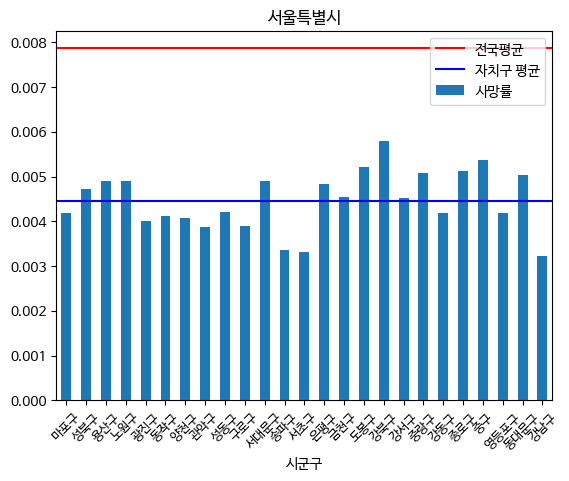

부산광역시


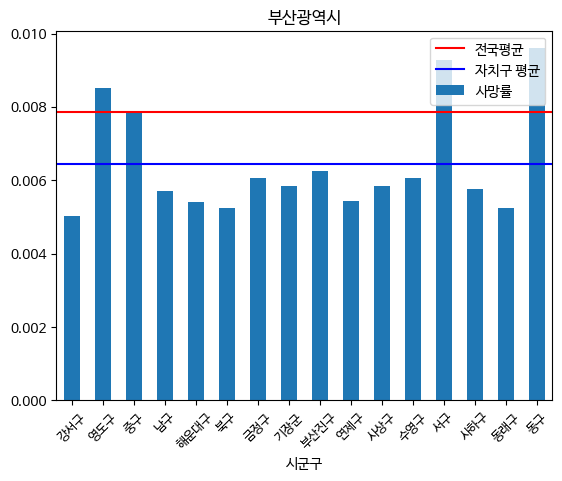

대구광역시


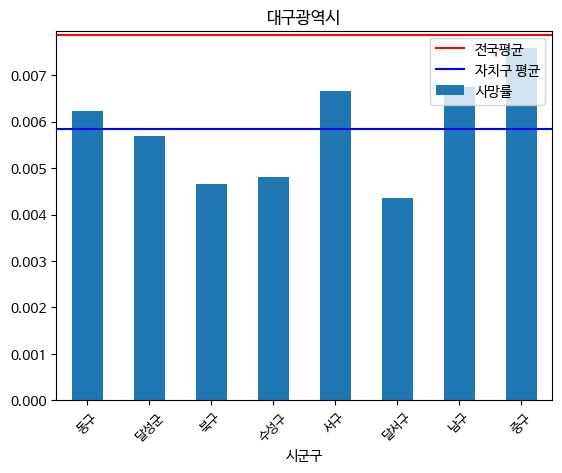

인천광역시


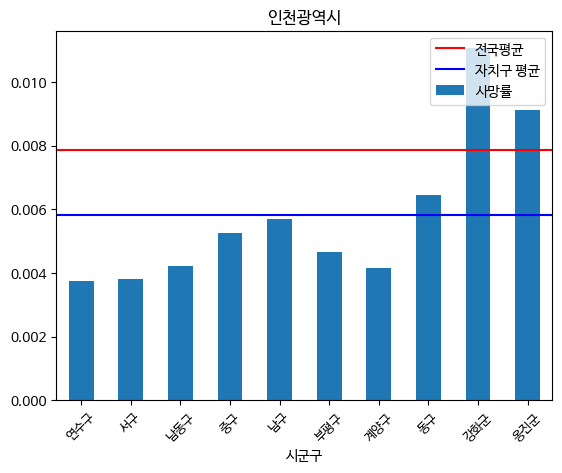

광주광역시


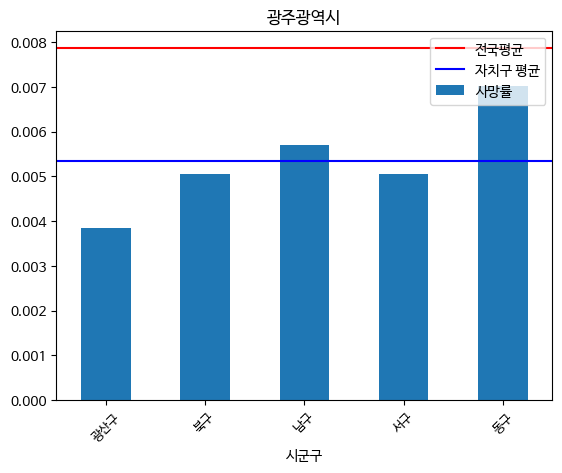

대전광역시


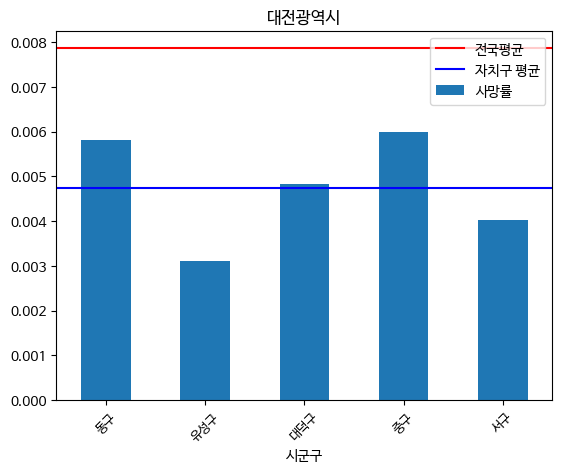

울산광역시


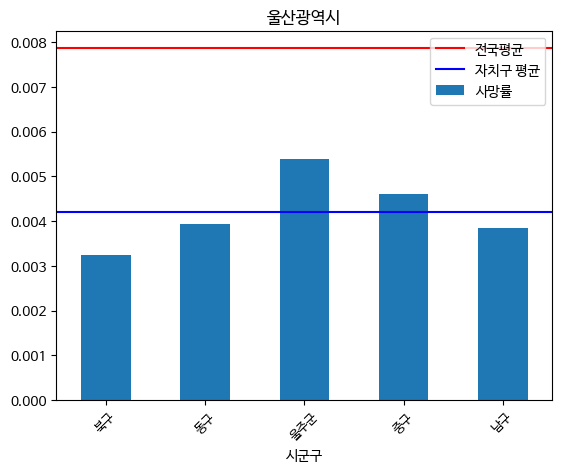

광주광역시


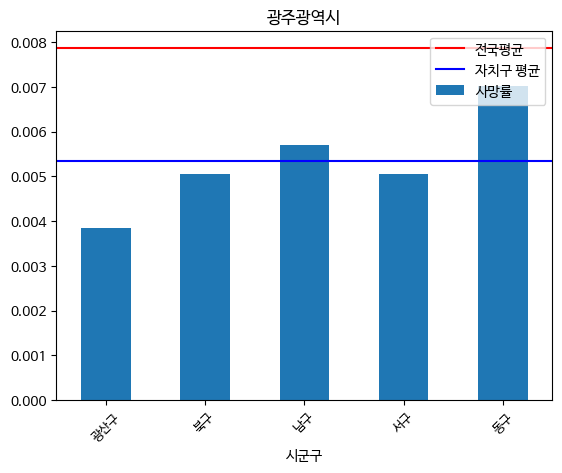

경기도


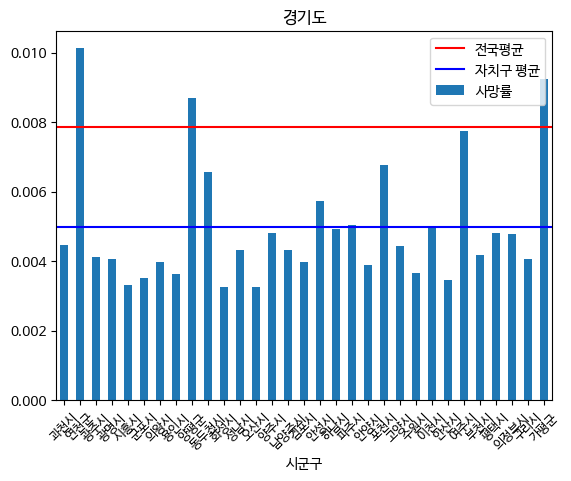

강원도


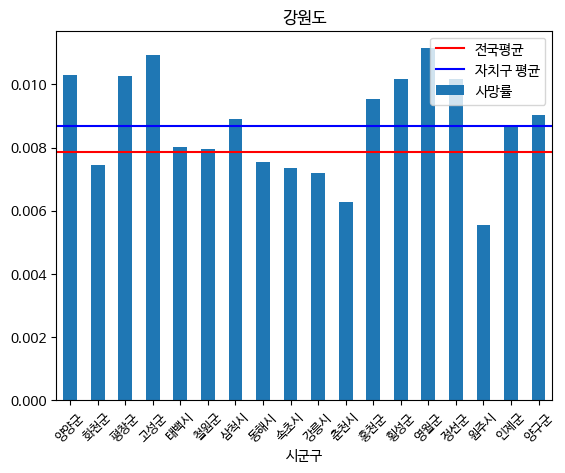

충청북도


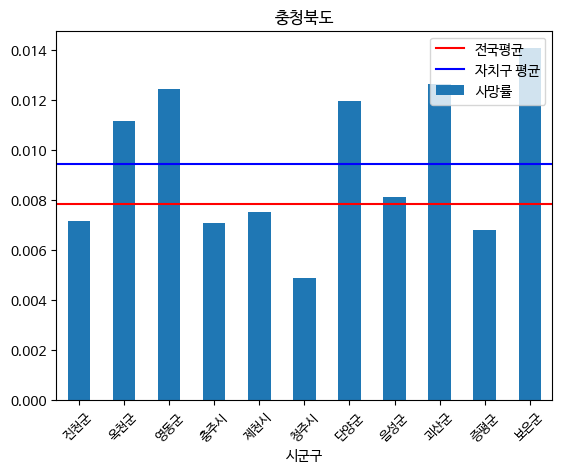

충청남도


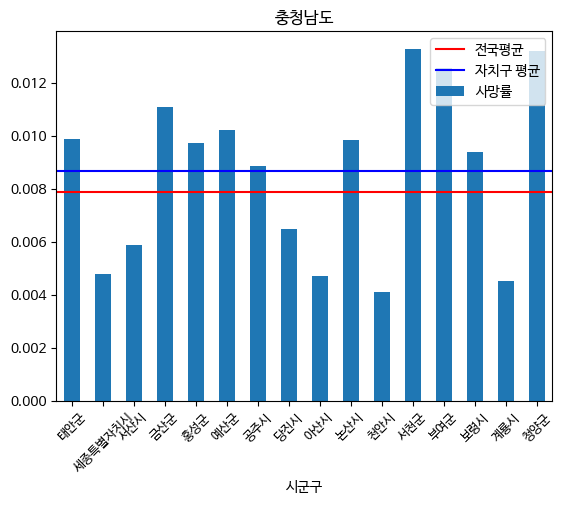

경상북도


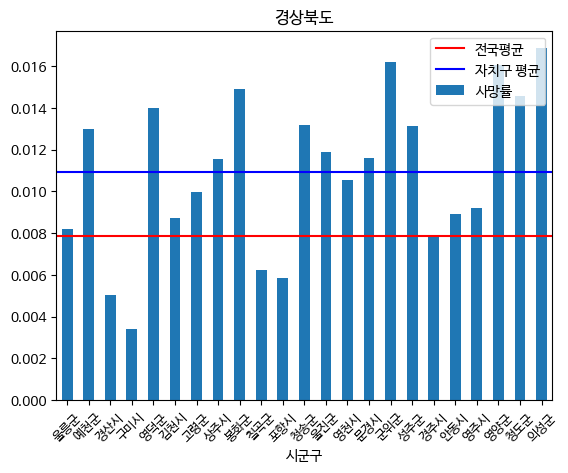

경상남도


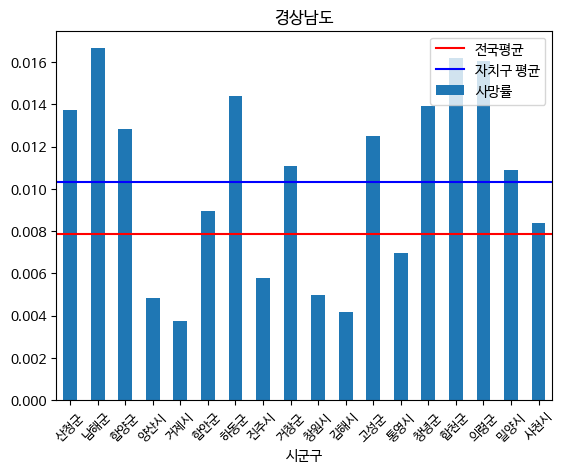

전라북도


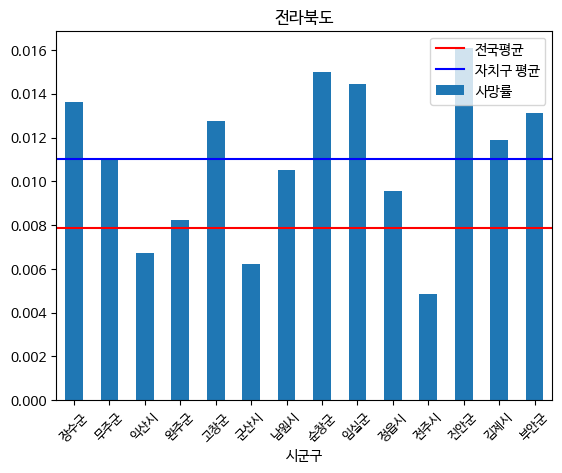

전라남도


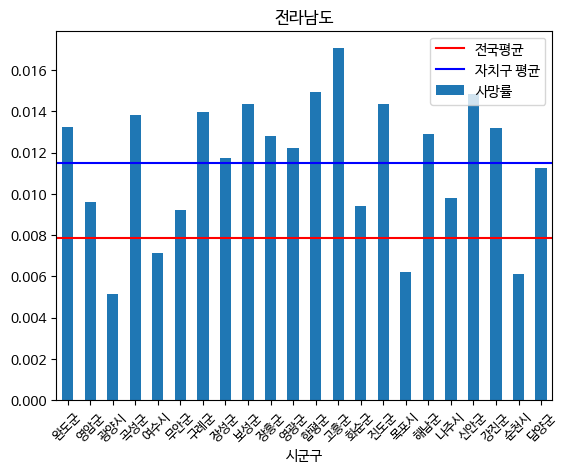

제주특별자치도


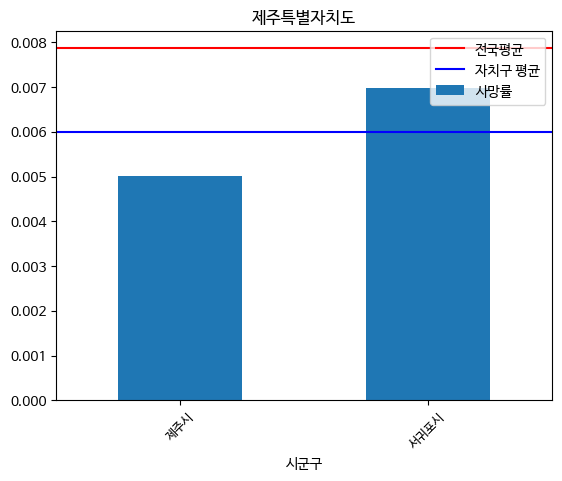

In [437]:
merged_df[['광역자치단체', '시군구']] = merged_df['지역'].str.split(' ', expand=True)

for i in provinces:
    print(i)
    sel = merged_df[merged_df['광역자치단체'] == i]
    sel.plot(kind='bar',x='시군구',y='DeathP',label='사망률')
    # DeathP 열의 평균값 계산
    mean = merged_df['DeathP'].mean()
    # 선 그래프 그리기
    plt.axhline(y=mean, color='r', linestyle='-',label='전국평균')

    mean2=sel['DeathP'].mean()
    plt.axhline(y=mean2, color='b', linestyle='-',label='자치구 평균')

    plt.legend(loc='upper right')

    plt.title(i)
    plt.xticks(rotation=45,fontsize=9)
    plt.savefig('./fig/%s.png'%i)
    plt.show()

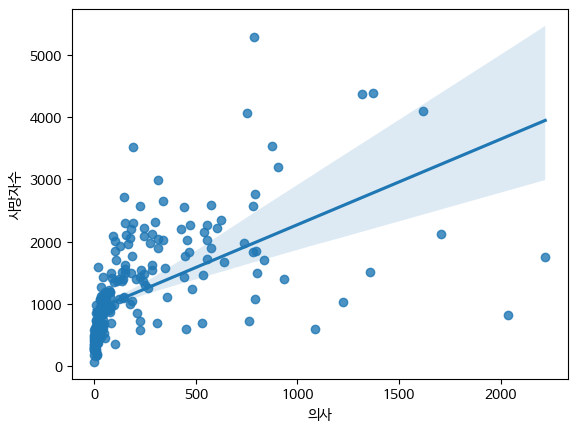

In [ ]:
import seaborn as sns

# 산점도와 회귀선 그리기
sns.regplot(x='의사', y='사망자수', data=merged_df)

# 그래프 출력
plt.show()


<Axes: xlabel='병상수', ylabel='사망자수'>

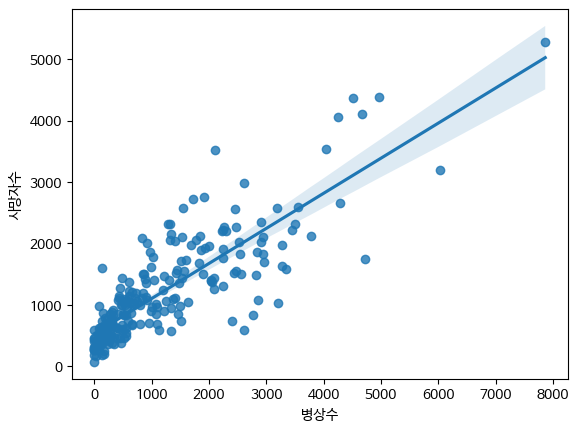

In [ ]:
sns.regplot(x='병상수', y='사망자수', data=merged_df)

In [ ]:
merged_df

,지역,인구수,병상수,병원수,사망자수,의사,BedP,HospitalP,DoctorP,DeathP,광역자치단체,시군구
0,강원도 양양군,25861,0,0,266,0,0.000000,0.000000,0.000000,0.010286,강원도,양양군
1,전라북도 장수군,21620,0,0,295,0,0.000000,0.000000,0.000000,0.013645,전라북도,장수군
2,경상북도 울릉군,8770,0,0,72,0,0.000000,0.000000,0.000000,0.008210,경상북도,울릉군
3,전라북도 무주군,23408,0,0,258,0,0.000000,0.000000,0.000000,0.011022,전라북도,무주군
4,경기도 과천시,64817,0,0,289,0,0.000000,0.000000,0.000000,0.004459,경기도,과천시
...,...,...,...,...,...,...,...,...,...,...,...,...
224,광주광역시 동구,104173,2407,11,732,762,0.023106,0.000106,0.007315,0.007027,광주광역시,동구
225,전라북도 부안군,52091,801,6,684,34,0.015377,0.000115,0.000653,0.013131,전라북도,부안군
226,경상북도 의성군,51021,495,6,860,8,0.009702,0.000118,0.000157,0.016856,경상북도,의성군
227,강원도 양구군,22497,163,3,203,12,0.007245,0.000133,0.000533,0.009023,강원도,양구군
